Imports

In [127]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from os import listdir
from os.path import isfile, join
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text
from keras import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from keras.models import Sequential
from keras import layers
from sklearn.svm import LinearSVC

Setup data for model

In [128]:
# Function that decides what symbols to keep
symb_keep = [" ", "!", "?", ".", ","] + list(string.ascii_letters)
str_fix = lambda str: "".join([char.lower() if char in symb_keep else char for char in str]).replace("‚Äô", "'")

# Load training data
with open('PA3_train.tsv', encoding="utf-8") as f:
    Y_train, X_train = [list(a) for a in list(zip(*[(int(line[0]), str_fix(line[4:])) for line in [line for line in f.readlines() if len(line) > 4] if (line.strip() and line[0] == line[2])]))]
    
with open('PA3_train_final.tsv', encoding="utf-8") as f:
    Y_train_extra, X_train_extra = zip(*[(int(line[0]), str_fix(line[6:])) for line in [line for line in f.readlines() if len(line) > 6] if (line.strip and line[0] == line[2] and line[2] == line[4])])

Y_train += Y_train_extra
X_train += X_train_extra

# Load test data
with open('PA3_test.tsv', encoding="utf-8") as f:
    Y_test, X_test = zip(*[(int(line[0]), str_fix(line[2:])) for line in f.readlines()])

SyntaxError: invalid character '§' (U+00A7) (123134530.py, line 2)

Function for displaying results

In [ ]:
def disp_result(y_test, y_predict):
    print(accuracy_score(y_test, y_predict))
    print(classification_report(y_test, y_predict))
    mat = confusion_matrix(y_test, y_predict)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, \
                cmap='coolwarm', linewidths=5)
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.show()

Testing other models

0.9491719017704169
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       865
           1       0.95      0.94      0.95       886

    accuracy                           0.95      1751
   macro avg       0.95      0.95      0.95      1751
weighted avg       0.95      0.95      0.95      1751



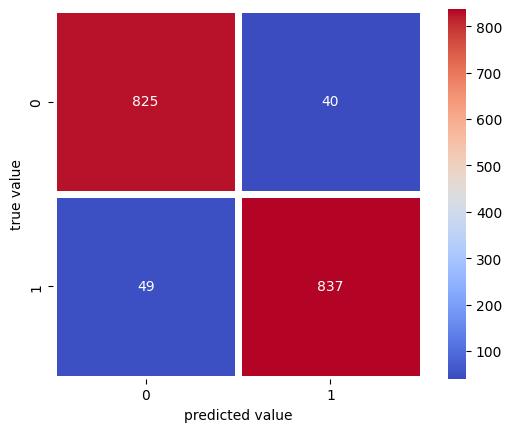

/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9605939463163906
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       865
           1       0.96      0.97      0.96       886

    accuracy                           0.96      1751
   macro avg       0.96      0.96      0.96      1751
weighted avg       0.96      0.96      0.96      1751



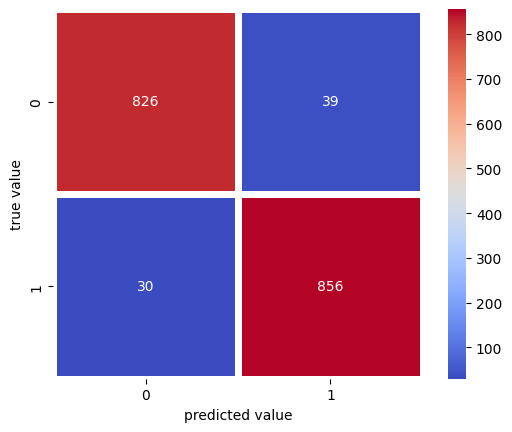

/home/david/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9514563106796117
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       865
           1       0.95      0.96      0.95       886

    accuracy                           0.95      1751
   macro avg       0.95      0.95      0.95      1751
weighted avg       0.95      0.95      0.95      1751



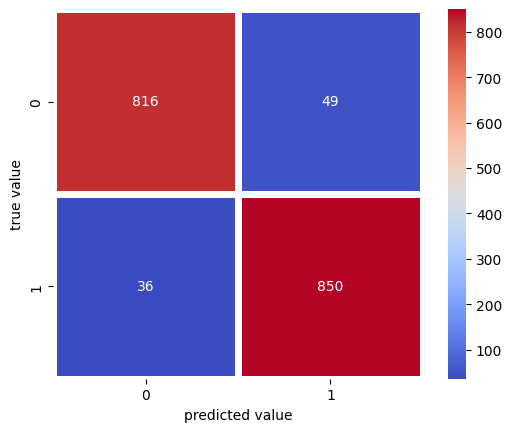

0.9531696173615077
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       865
           1       0.94      0.97      0.95       886

    accuracy                           0.95      1751
   macro avg       0.95      0.95      0.95      1751
weighted avg       0.95      0.95      0.95      1751



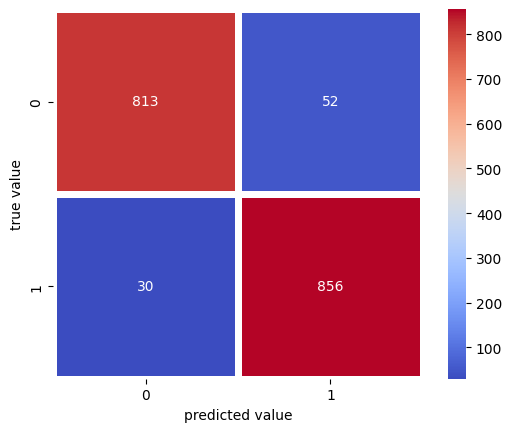

In [ ]:
models = [MultinomialNB(), LogisticRegression(), LinearSVC(), SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=1337, max_iter=7, tol=None)]

vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
for model in models:
    model.fit(X_train_count, Y_train)
    y_predict = model.predict(vectorizer.transform(X_test))
    disp_result(Y_test, y_predict)

Run and save deep learning model

In [ ]:
# Prepare model

# Set input size
max_words = 8000
Y_test_old = Y_test

# Tokenize layers
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(X_train) # only fit on train

# Convert text to matrix
X_train = tokenize.texts_to_matrix(X_train)
X_test = tokenize.texts_to_matrix(X_test)

encoder = LabelEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)
Y_test = encoder.transform(Y_test)

num_classes = np.max(Y_train) + 1
Y_train = utils.to_categorical(Y_train, num_classes)
Y_test = utils.to_categorical(Y_test, num_classes)

# Set batch size and amount of epochs
batch_size = 16
epochs = 1

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# Compire and save model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.save('resturant_classifier.h5')
              
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(X_test, Y_test))

864/864 [==============================] - 38s 42ms/step - loss: 0.1185 - accuracy: 0.9570 - val_loss: 0.1142 - val_accuracy: 0.9623
